https://github.com/isabelleantaran/GSB-544-Projects/tree/main/week2

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [9]:
import numpy as np 
import pandas as pd 

# Import the titanic dataset here

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")




In [6]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [7]:
df_titanic.describe()

,age,ticketno,fare,survived
count,2205.000000,1.316000e+03,1291.000000,2207.000000
mean,30.436735,2.842157e+05,33.404760,0.322157
std,12.159677,6.334726e+05,52.227592,0.467409
min,0.166667,2.000000e+00,3.030500,0.000000
25%,22.000000,1.426225e+04,7.180600,0.000000
50%,29.000000,1.114265e+05,14.090200,0.000000
75%,38.000000,3.470770e+05,31.060750,1.000000
max,74.000000,3.101317e+06,512.060700,1.000000


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [11]:
passengers = df_titanic[
    (df_titanic['class'] == '3rd') |
    (df_titanic['class'] == '2nd') |
    (df_titanic['class'] == '1st')
]

crosstab= pd.crosstab(passengers["class"], passengers["embarked"])

print(passengers)
print(crosstab)

                                name  gender   age  ...  ticketno     fare survived
0                Abbing, Mr. Anthony    male  42.0  ...    5547.0   7.1100        0
1          Abbott, Mr. Eugene Joseph    male  13.0  ...    2673.0  20.0500        0
2        Abbott, Mr. Rossmore Edward    male  16.0  ...    2673.0  20.0500        0
3     Abbott, Mrs. Rhoda Mary 'Rosa'  female  39.0  ...    2673.0  20.0500        1
4        Abelseth, Miss. Karen Marie  female  16.0  ...  348125.0   7.1300        1
...                              ...     ...   ...  ...       ...      ...      ...
1314          Yvois, Miss. Henriette  female  24.0  ...  248747.0  13.0000        0
1315       Zakarian, Mr. Mapriededer    male  22.0  ...    2656.0   7.0406        0
1316             Zakarian, Mr. Ortin    male  27.0  ...    2670.0   7.0406        0
1317               Zenni, Mr. Philip    male  25.0  ...    2620.0   7.0406        1
1318             Zimmermann, Mr. Leo    male  29.0  ...  315082.0   7.1706  

## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [25]:
# P(class | embarked)
conditional_class_given_embark = pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize= "columns"
)

print(conditional_class_given_embark)


embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


In [ ]:
# P(Embarked | Class)

conditional_embark_given_class = pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize= "index"
)

print(conditional_embark_given_class)

embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


The proportion of 3rd class passengers that embarked at South Hampton was 69.67%.\
The proportion of South Hampton passengers that were 3rd class was 54.01%

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

The barchat below provides a clear visualization showing the distribution of 1, 2, or 3 passengers at the embarkation ports.\
The advantage to this is that individuals can clearly see where the majority of people embarked and an approximate amount of them in specific class given where they embarked.\
However, the disadvantage of the visualization is that we cannot see the specific numerical values.\
While the barchart can provide simple visualizations, it represents proportions and not specific counts. This can lead to misinterpretations.

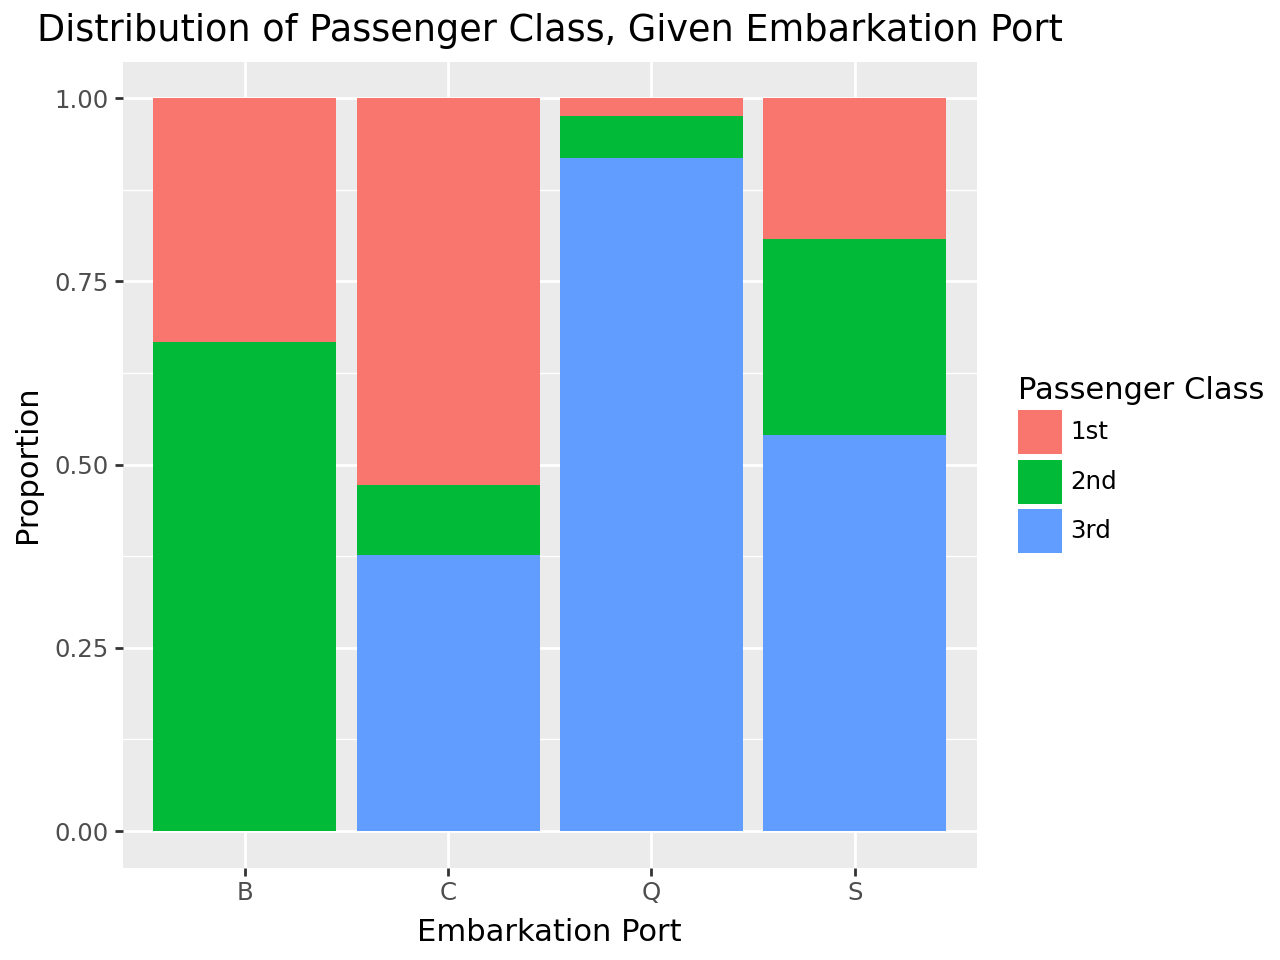

In [28]:
import plotnine as p9

plotBar = (
    p9.ggplot(data = passengers)
    +p9.aes(x= "embarked", fill= "class")
    +p9.geom_bar(position= "fill")
    +p9.labs(
        x= "Embarkation Port", 
        y= "Proportion",
        title= "Distribution of Passenger Class, Given Embarkation Port"
    )

    +p9.scale_fill_discrete(name= "Passenger Class")
)

plotBar.show()